In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine

In [32]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_scaler = StandardScaler().fit_transform(X)

In [33]:
# Changing K-means up to 6
k_clusters = [2, 3, 4, 5, 6]
clusters = []
for i in k_clusters:
    clusters.append(KMeans(n_clusters=i, random_state=123).fit_predict(X_scaler))

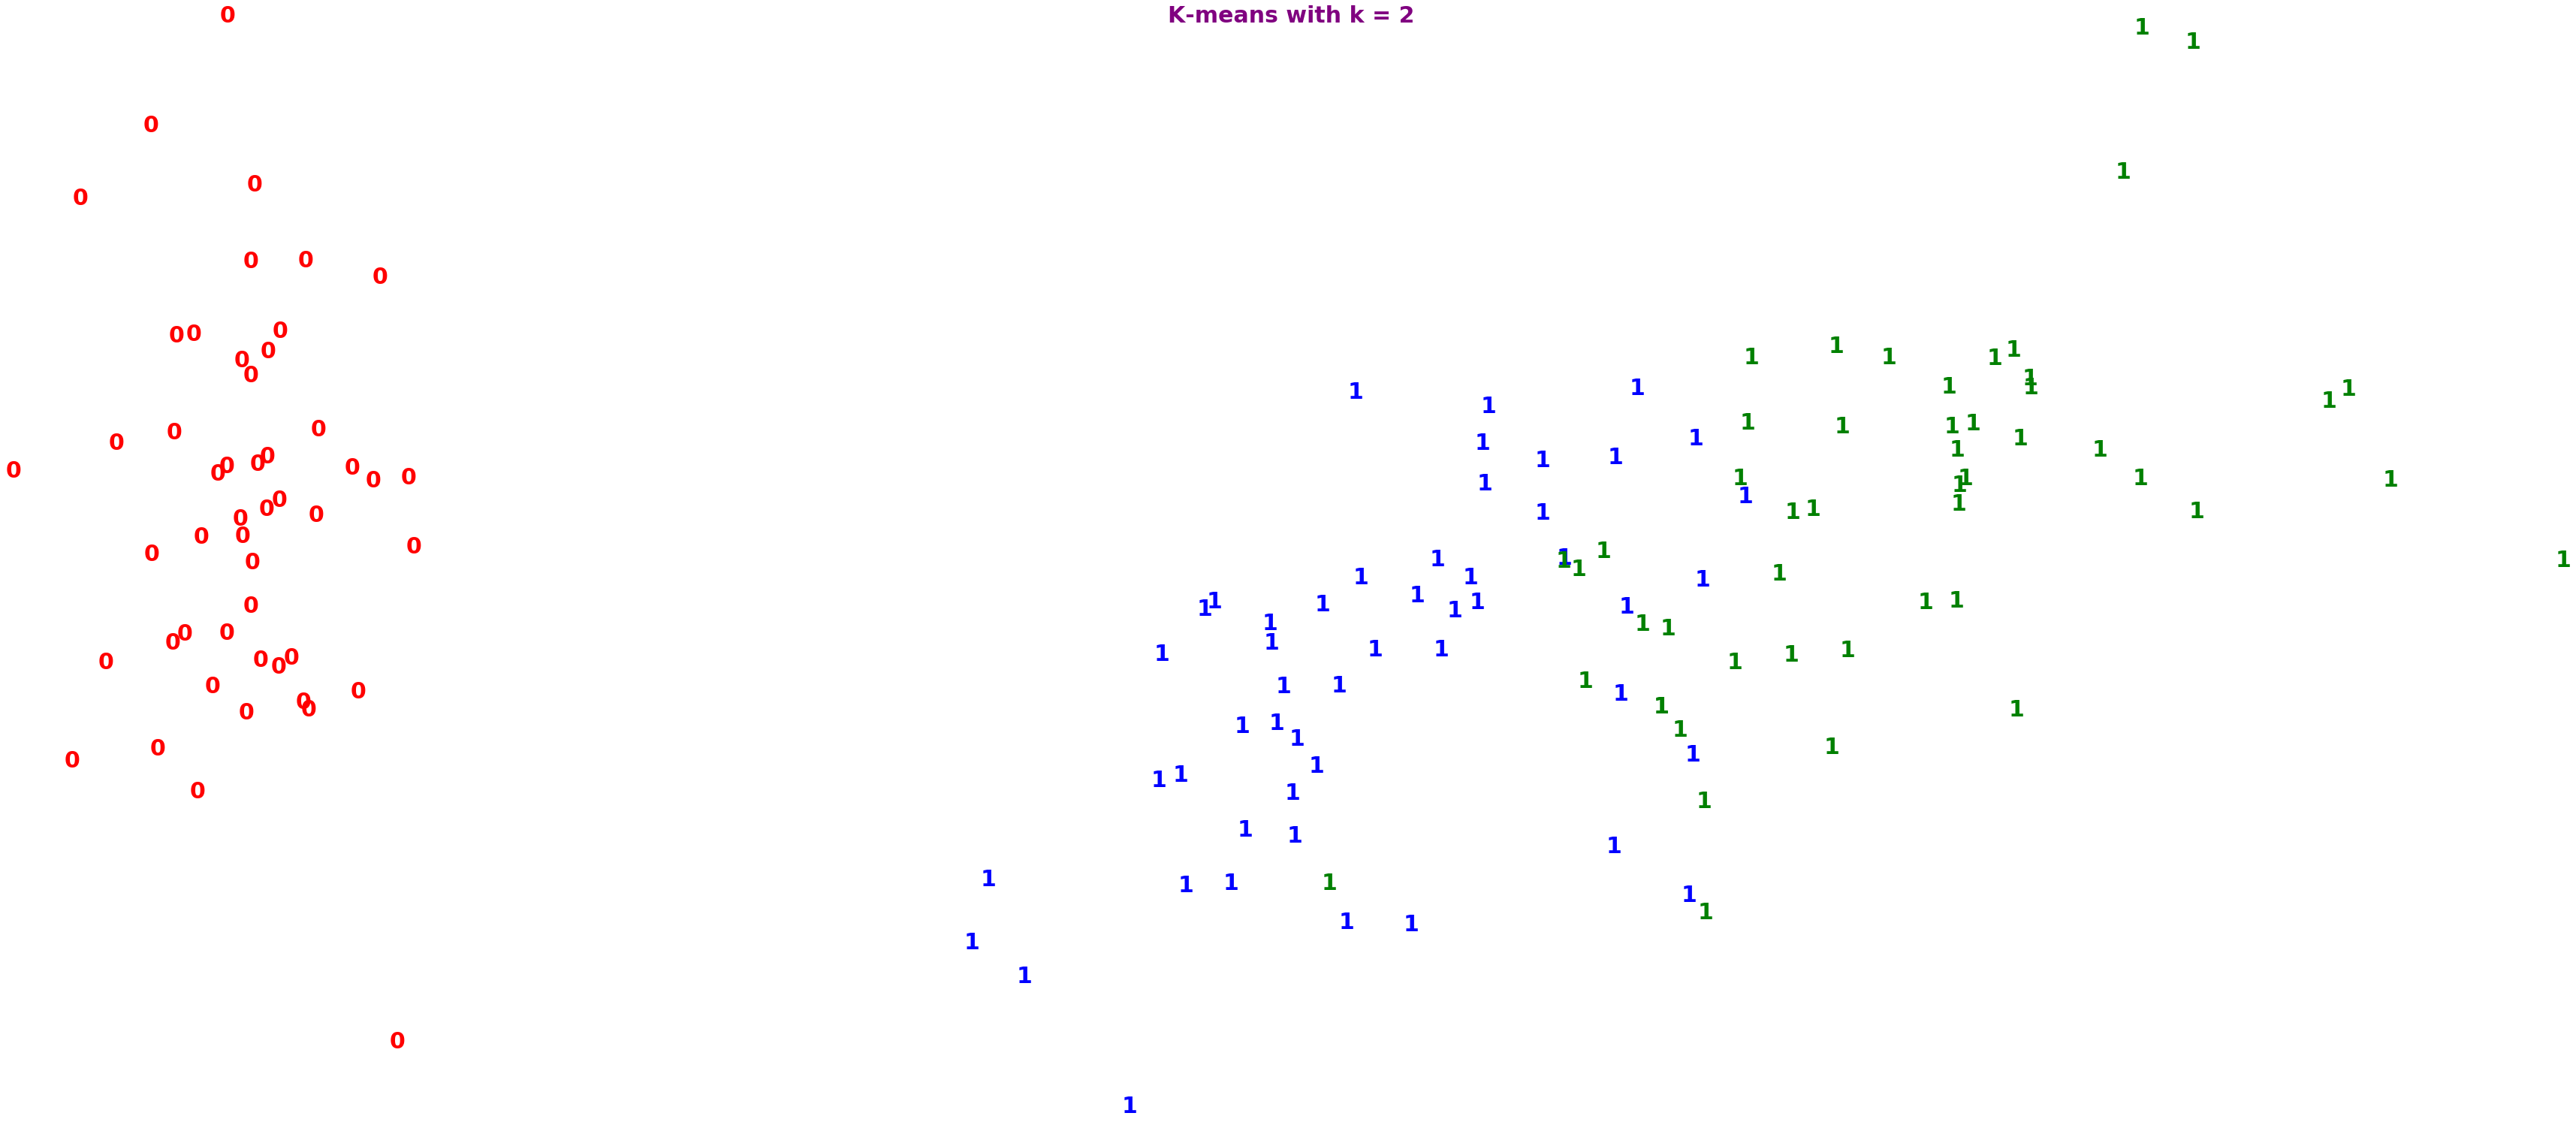

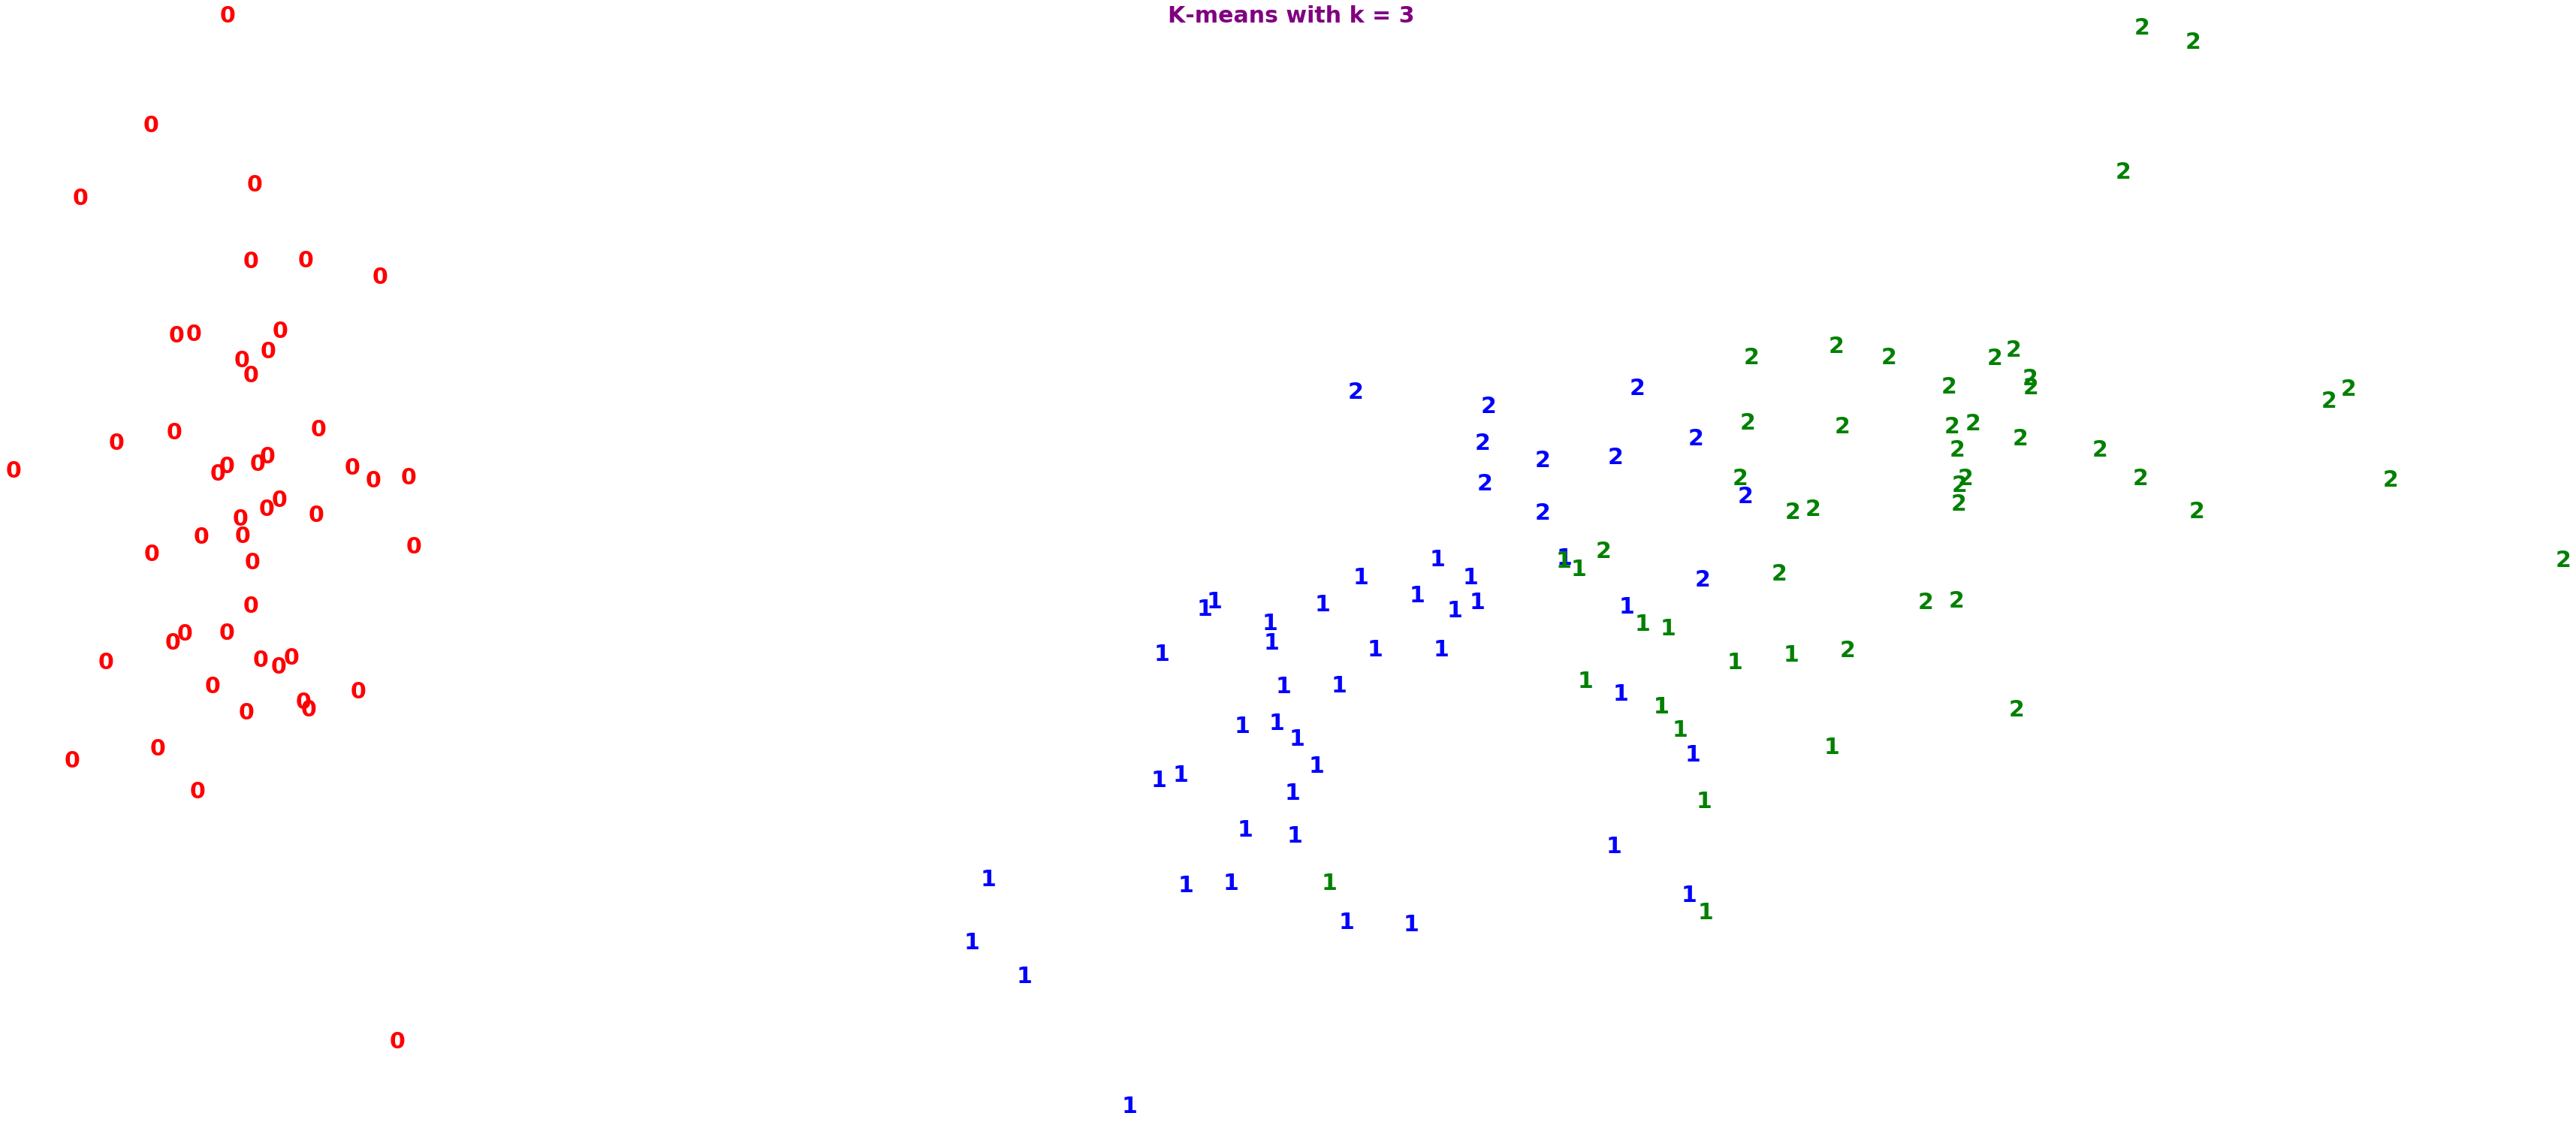

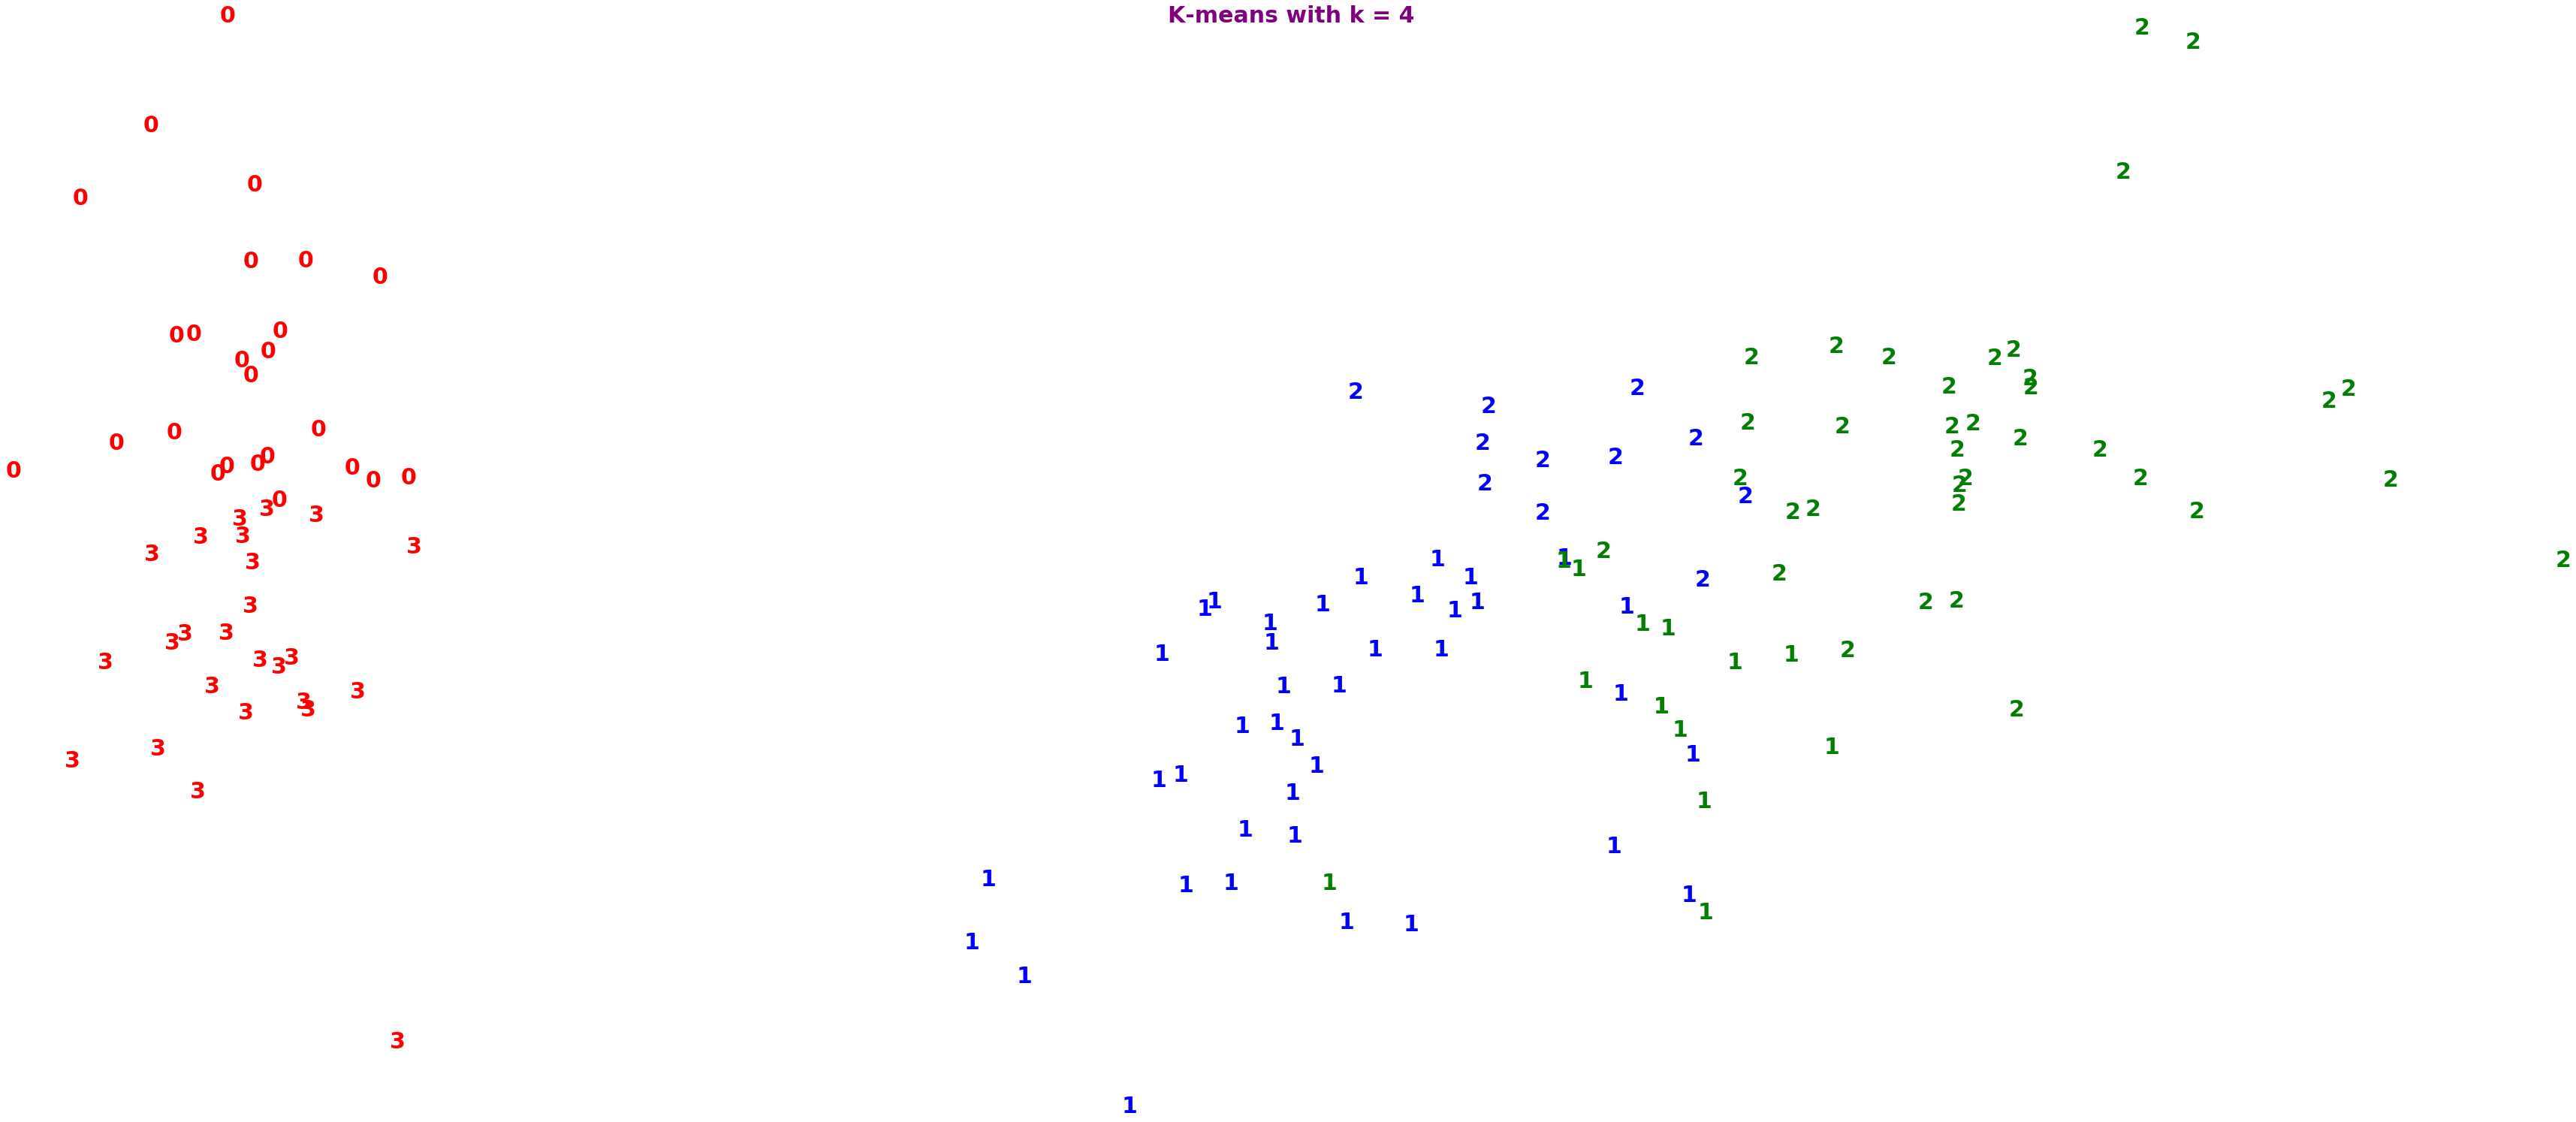

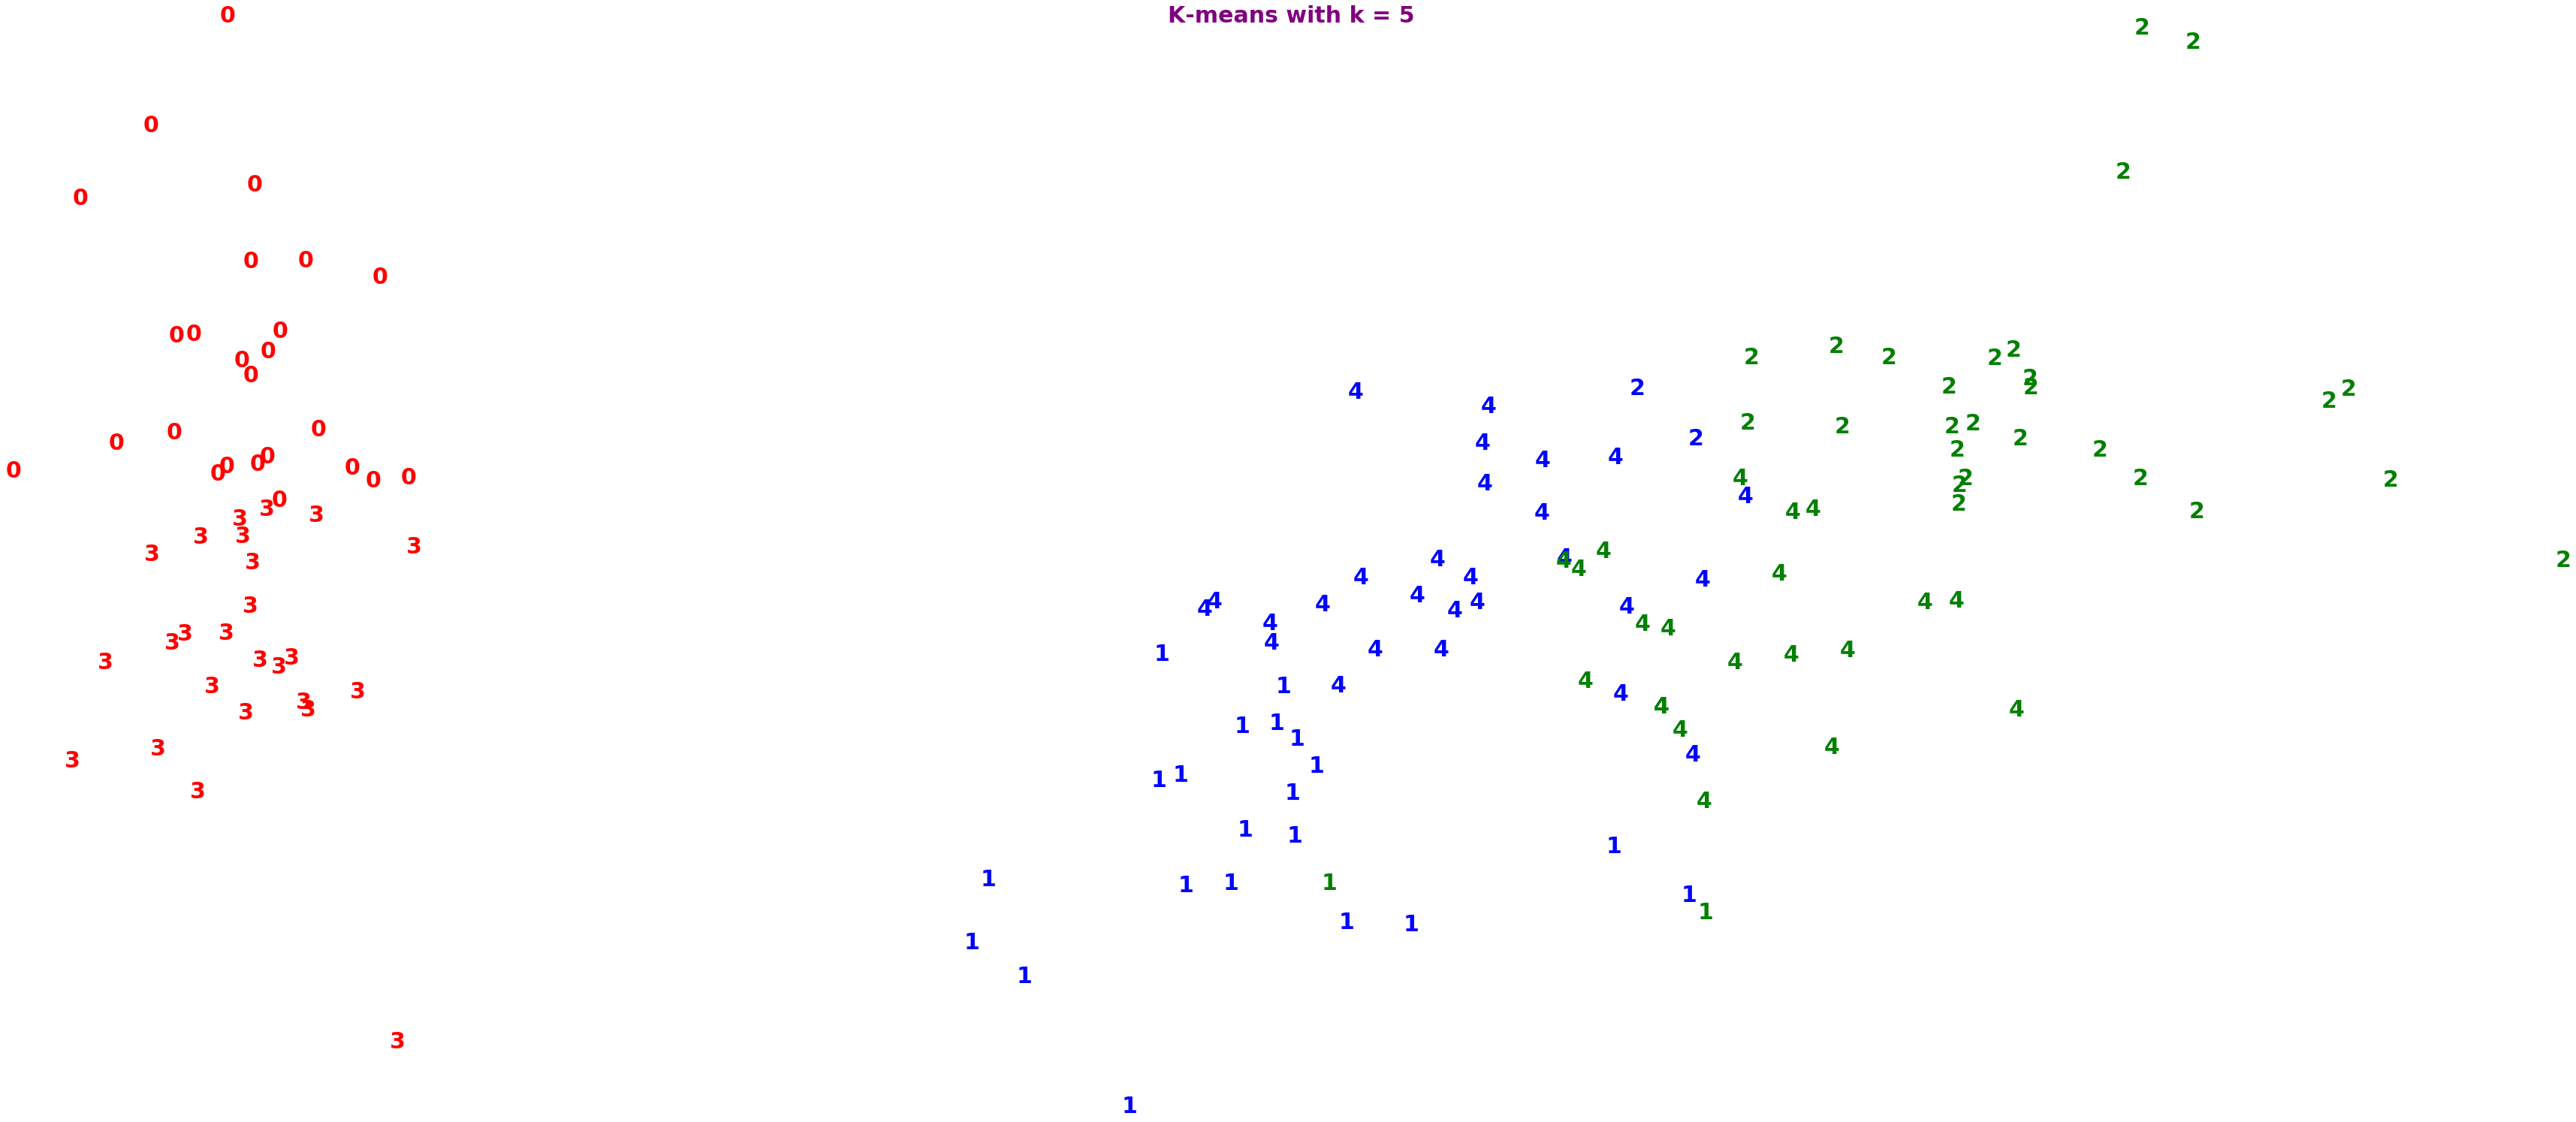

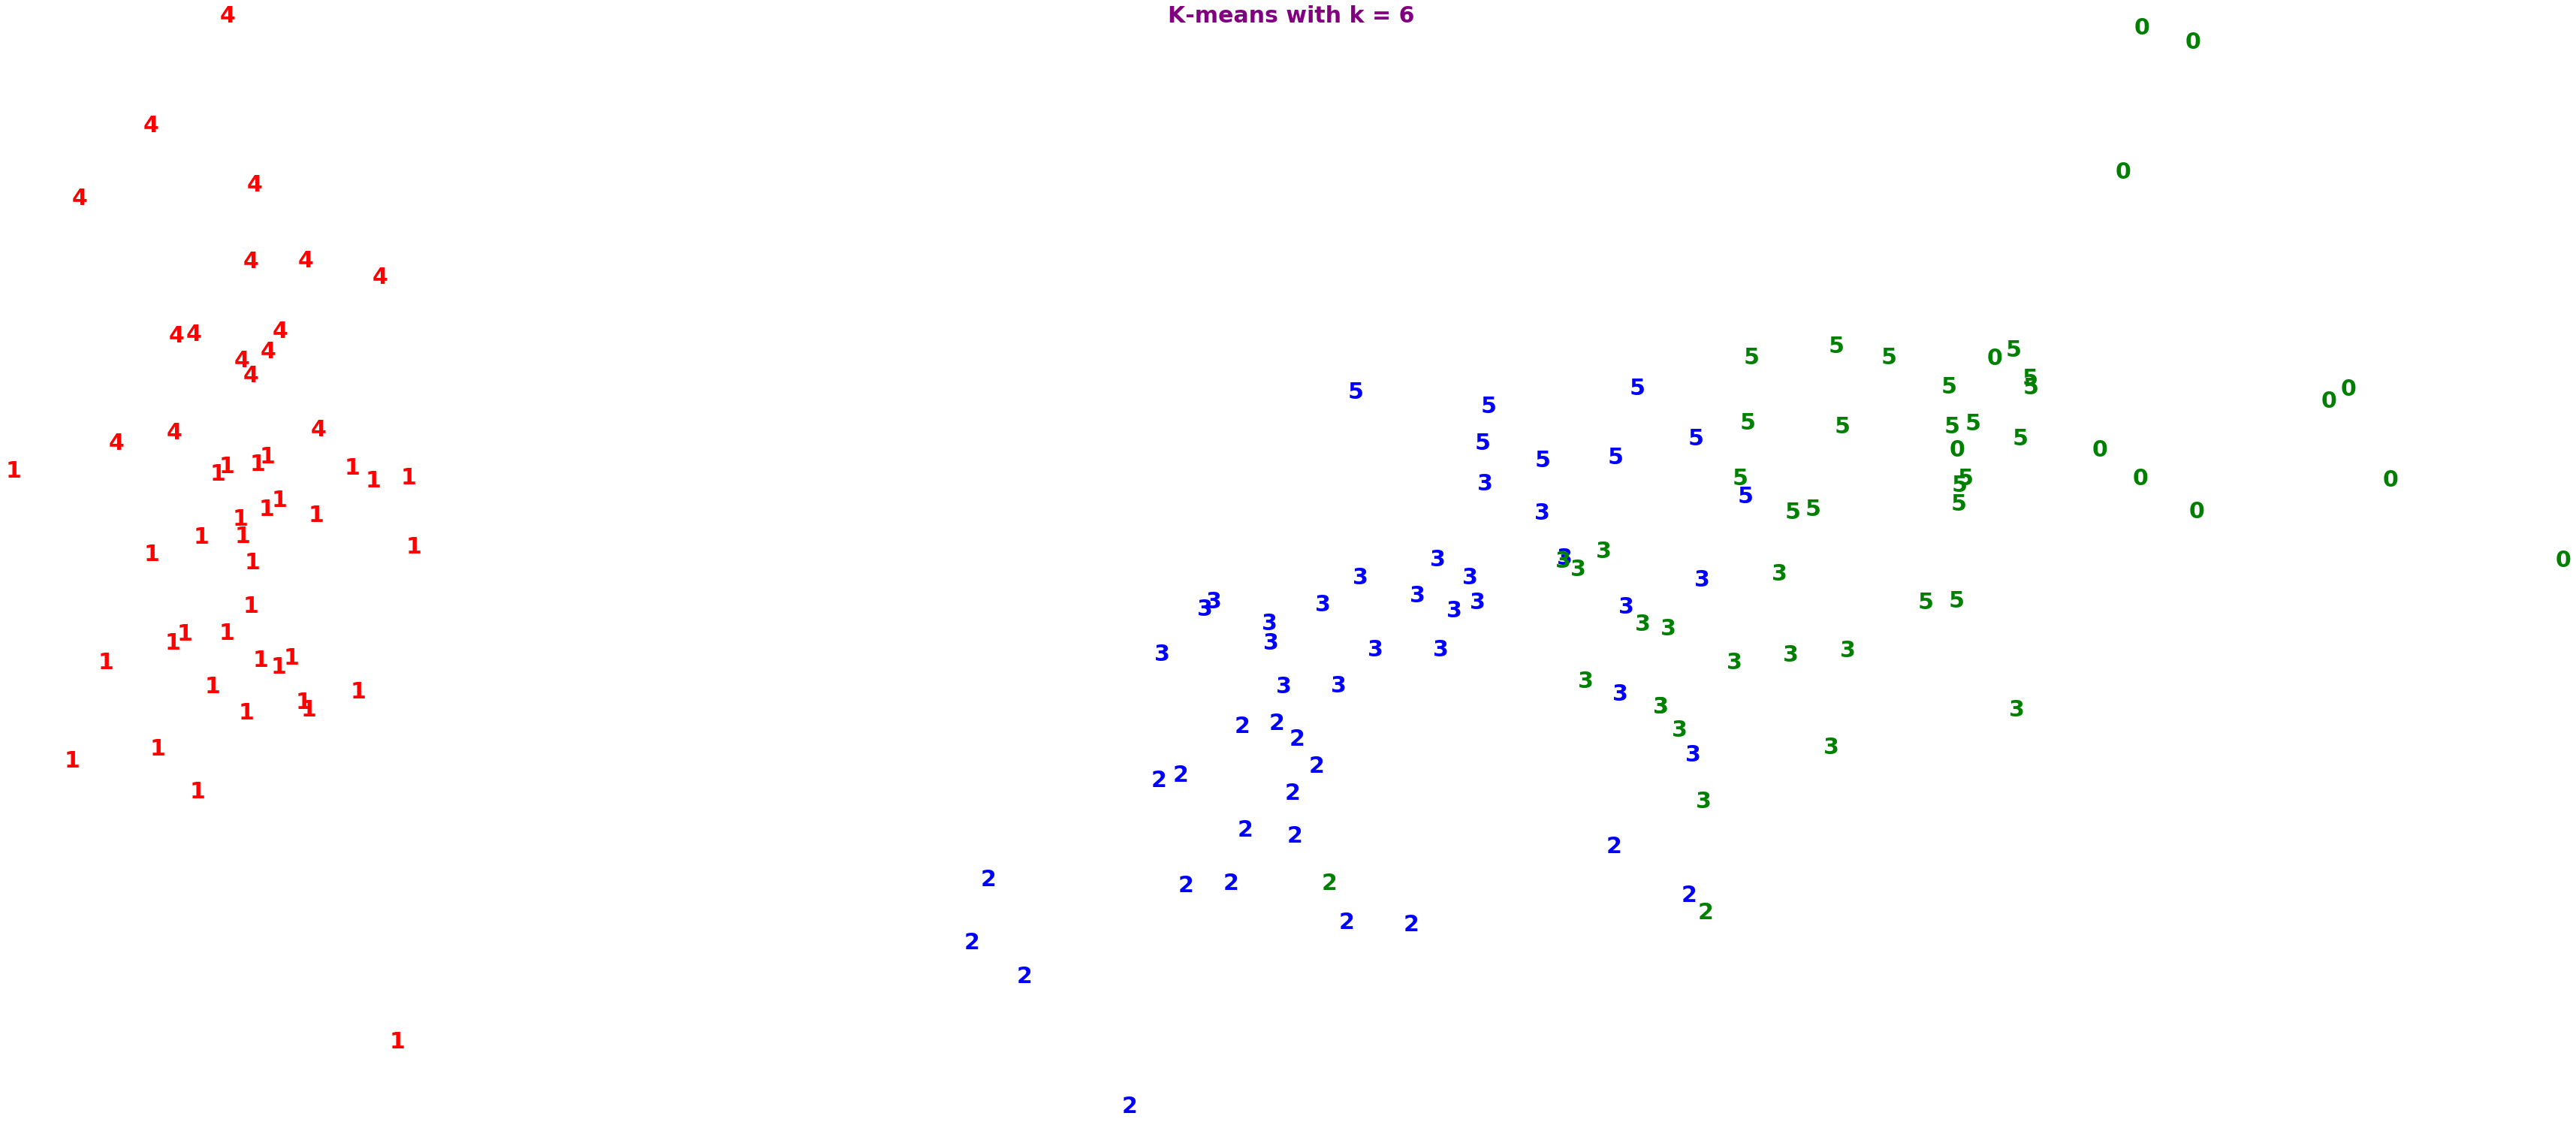

In [34]:
pca = PCA(n_components=2).fit_transform(X_scaler)

colors = 'rbg'
for i, solution in enumerate(clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(k_clusters[i]),
                 fontdict={'weight': 'bold', 'size': 30, 'color': 'purple'})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colors[y[i]],
                 fontdict={'weight': 'bold', 'size': 30}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

The best solution is when k = 3, it has the better seperation and provides 3 distinct clusters.